# Greedy Strategy

In [208]:
#imports, nothing to see here
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
n = 10
arms = np.random.rand(n)
eps = 0.1
arms

array([ 0.72525694,  0.32193374,  0.51203248,  0.94174224,  0.28919483,
        0.9892193 ,  0.29146385,  0.63523101,  0.98542736,  0.68683405])

In [210]:
def reward(prob):
    reward = 0;
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

### Here bestArm always retrieve the arm index which has so far delivered the best mean score

In [211]:
#initialize memory array; has 1 row defaulted to random action index
mus = np.array([0.0]*n)
nbs = np.array([0]*n)

#greedy method to select best arm based on memory array (historical results)
def bestArm(mus):
    bestArm = 0 #just default to 0
    return np.argmax(mus)

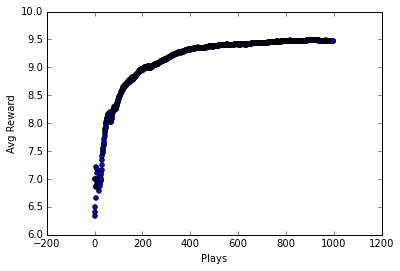

In [212]:
plt.xlabel("Plays")
plt.ylabel("Avg Reward")
for i in range(1000):
    if random.random() > eps: #greedy arm selection
        choice = bestArm(mus)
    else: #random arm selection
        choice = np.where(arms == np.random.choice(arms))[0][0]
    rew = reward(arms[choice])
    nb = nbs[choice]
    mus[choice] = (nb * mus[choice] + 10 * rew) / (nb + 10)
    nbs[choice] += 10
    mean = np.sum(mus*nbs)/np.sum(nbs)
    
    plt.scatter(i, mean)

In [213]:
mus

array([ 7.125     ,  3.1       ,  5.8       ,  9.33766234,  2.25      ,
        9.89625   ,  3.36363636,  6.9       ,  9.88235294,  7.875     ])

# With Softmax

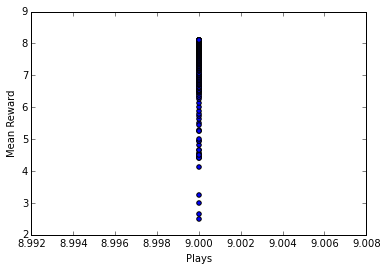

In [214]:
n = 10
arms = np.random.rand(n)

av = np.ones(n) #initialize action-value array, stores running reward mean
counts = np.zeros(n) #stores counts of how many times we've taken a particular action
#stores our softmax-generated probability ranks for each action
av_softmax = np.zeros(n)
av_softmax[:] = 0.1 #initialize each action to have equal probability

def reward(prob):
    total = 0;
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

tau = 1.12 #tau was selected by trial and error
def softmax(av):
    probs = np.zeros(n)
    for i in range(n):
        softm = ( np.exp(av[i] / tau) / np.sum( np.exp(av[:] / tau) ) )
        probs[i] = softm
    return probs

plt.xlabel("Plays")
plt.ylabel("Mean Reward")
for i in range(500):
    #select random arm using weighted probability distribution
    choice = np.where(arms == np.random.choice(arms, p=av_softmax))[0][0]
    counts[choice] += 1
    k = counts[choice]
    rwd =  reward(arms[choice])
    old_avg = av[choice]
    new_avg = old_avg + (1/k)*(rwd - old_avg)
    av[choice] = new_avg
    av_softmax = softmax(av) #update softmax probabilities for next play

    runningMean = np.average(av, weights=np.array([counts[i]/np.sum(counts) for i in range(len(counts))]))
    plt.scatter(i, runningMean)